# Reproduce results

## [[72, 12, 6]]

In [7]:

import src.build_circuit as build_circuit
import sinter
from bposdd import BPOSD
import matplotlib.pyplot as plt
from bposd.css import css_code
from src.codes_q import create_bivariate_bicycle_codes
import numpy as np
import stim
import sys

In [2]:
code, A_list, B_list = create_bivariate_bicycle_codes(12, 6, [3], [1,2], [1,2], [3]) # 144
p = 1e-3
circuit = build_circuit.build_circuit(code, A_list, B_list, p, num_repeat = 12, z_basis= True)

In [ ]:
with np.printoptions(threshold=sys.maxsize):
        print(code.lx)

[[0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0

In [10]:
circuit

stim.Circuit('''
    R 0 216
    X_ERROR(0.001) 0 216
    R 1 217
    X_ERROR(0.001) 1 217
    R 2 218
    X_ERROR(0.001) 2 218
    R 3 219
    X_ERROR(0.001) 3 219
    R 4 220
    X_ERROR(0.001) 4 220
    R 5 221
    X_ERROR(0.001) 5 221
    R 6 222
    X_ERROR(0.001) 6 222
    R 7 223
    X_ERROR(0.001) 7 223
    R 8 224
    X_ERROR(0.001) 8 224
    R 9 225
    X_ERROR(0.001) 9 225
    R 10 226
    X_ERROR(0.001) 10 226
    R 11 227
    X_ERROR(0.001) 11 227
    R 12 228
    X_ERROR(0.001) 12 228
    R 13 229
    X_ERROR(0.001) 13 229
    R 14 230
    X_ERROR(0.001) 14 230
    R 15 231
    X_ERROR(0.001) 15 231
    R 16 232
    X_ERROR(0.001) 16 232
    R 17 233
    X_ERROR(0.001) 17 233
    R 18 234
    X_ERROR(0.001) 18 234
    R 19 235
    X_ERROR(0.001) 19 235
    R 20 236
    X_ERROR(0.001) 20 236
    R 21 237
    X_ERROR(0.001) 21 237
    R 22 238
    X_ERROR(0.001) 22 238
    R 23 239
    X_ERROR(0.001) 23 239
    R 24 240
    X_ERROR(0.001) 24 240
    R 25 241
    X_ERROR(0.0

In [11]:
tasks = []
p_range = [1e-3, 2e-3, 3e-3, 4e-3, 5e-3]
for p in p_range:
    tasks.append(sinter.Task(circuit=circuit,json_metadata={'p': p, 
                                                'Code': f'[{code.N}, {code.K}, {code.D}] Weight {6}'}))
samples = sinter.collect(
    num_workers=8,
    max_shots=10_000_000,
    max_errors=100,
    tasks=tasks,
    decoders=['bposd'],
    custom_decoders={'bposd': BPOSD(max_iter=1_000, bp_method="ms", osd_order=10, osd_method="osd_cs")},
    print_progress=True,
)

Starting 8 workers...
/Users/shifanxu/Desktop/Codes/qLDPC/qPLDC-MSD/.venv/lib/python3.13/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bposd_decoder.py:45: UserWarning: This is the old syntax for the `bposd_decoder` from `ldpc v1`. Use the `BpOsdDecoder` class from `ldpc v2` for additional features.
  warnings.warn(
/Users/shifanxu/Desktop/Codes/qLDPC/qPLDC-MSD/.venv/lib/python3.13/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bposd_decoder.py:45: UserWarning: This is the old syntax for the `bposd_decoder` from `ldpc v1`. Use the `BpOsdDecoder` class from `ldpc v2` for additional features.
  warnings.warn(
/Users/shifanxu/Desktop/Codes/qLDPC/qPLDC-MSD/.venv/lib/python3.13/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bposd_decoder.py:45: UserWarning: This is the old syntax for the `bposd_decoder` from `ldpc v1`. Use the `BpOsdDecoder` class from `ldpc v2` for additional features.
  warnings.warn(
/Users/shifanxu/Desktop/Codes/qLDPC/qPLDC-MSD/.venv/lib/python3.13/site-packages/ldpc/_legacy_ldpc_

[sinter.TaskStats(strong_id='a080df6ea9485d296d45a17d8c9b75f7a65437b418707ed3d226e12f3696a020', decoder='bposd', json_metadata={'p': 0.002, 'Code': '[144, 12, 6] Weight 6'}, shots=10000000, errors=12, seconds=27668.7932471307), sinter.TaskStats(strong_id='dc74bc7dc0f2fb1350eb207d791d6c294f41f11d6f6bb1cd7a03efc4a344e715', decoder='bposd', json_metadata={'p': 0.004, 'Code': '[144, 12, 6] Weight 6'}, shots=10000000, errors=7, seconds=26677.86904716358), sinter.TaskStats(strong_id='740e2f3ecb3e6a4cc4d38f463951f7ba8340e128b8437195fd6d1bd106926af1', decoder='bposd', json_metadata={'p': 0.003, 'Code': '[144, 12, 6] Weight 6'}, shots=10000000, errors=12, seconds=26669.72564464179), sinter.TaskStats(strong_id='aba13f22ada6b287841e315838635c79e90480491d7575c904eec3d902bf3651', decoder='bposd', json_metadata={'p': 0.001, 'Code': '[144, 12, 6] Weight 6'}, shots=10000000, errors=9, seconds=27519.190868729725), sinter.TaskStats(strong_id='fafa2edfc1b42659d128e414adeef889845b45ae0c36086a216d48d872e77

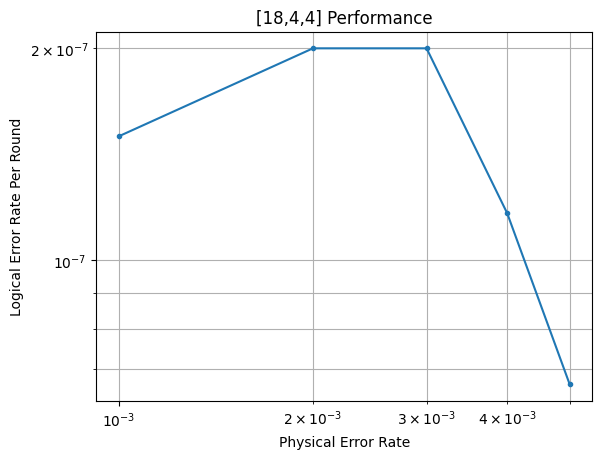

In [12]:
print(samples)
err_rates = [0 for _ in p_range]
for sample in samples:
    p = sample.json_metadata['p']
    err_rates[p_range.index(p)] = 1 - (1 - (sample.errors / sample.shots))**(1/code.D)
plt.plot(p_range, err_rates, marker='.')
plt.loglog()
plt.grid(which='both')
plt.title('[18,4,4] Performance')
plt.ylabel('Logical Error Rate Per Round')
plt.xlabel('Physical Error Rate')
plt.show()

# Comparison

## [[126, 12, 10]] CBB

In [21]:
p1 = [0, 1, 58]
p2 = [0, 13, 41]
l = 7
m = 9
d = 10
code = qLDPC('CBB', l, m, p1, p2, d)
dev = Device('CBB', 0, 0, 0,0, 5, 1)
solx, solz = tsp_schedule('CBB', p1, p2, l, m, dev)
plot_movement_history(l, m, 'CBB', solx, dev)
print(move_time(solx, solz))
csscode = css_code(code.hx, code.hz)
csscode.test()

NameError: name 'Device' is not defined

In [ ]:
tasks = []
p_range = [1e-3, 2e-3, 3e-3, 4e-3, 5e-3]
for p in p_range:
    dev = Device(gate1_err=p, gate2_error=p, readout_err=p, t1=1e6, t2=1e6, spacing=5, multiplier=.5)
    circ = Circuit(l, m, 'CBB', dev, (solx, solz), code)
    circ.generate_circuit(d)
    tasks.append(sinter.Task(circuit=circ.circuit, 
                                 json_metadata={'p': p, 
                                                'Code': f'[{code.n}, {code.k}, {code.d}] Weight {6}'}))
svg = circ.circuit.diagram('timeline-svg')
with open('CBB.svg', 'w') as f:
    f.write(str(svg))

samples = sinter.collect(
    num_workers=10,
    max_shots=1_000_000,
    max_errors=100,
    tasks=tasks,
    decoders=['bposd'],
    custom_decoders={'bposd': BPOSD(max_iter=10_000, bp_method="ms", osd_order=10, osd_method="osd_cs")}
)

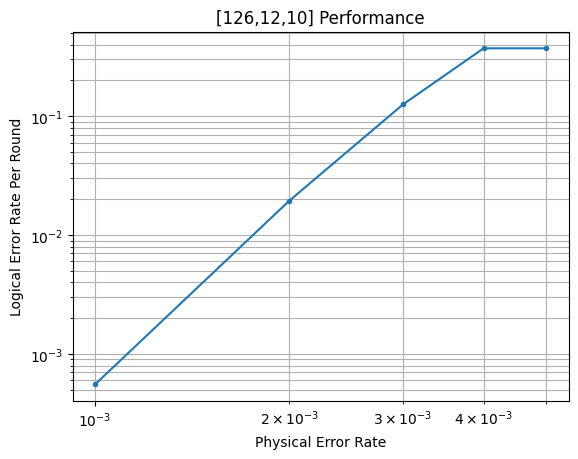

In [ ]:
err_rates = [0 for _ in p_range]
for sample in samples:
    p = sample.json_metadata['p']
    err_rates[p_range.index(p)] = 1 - (1 - (sample.errors / sample.shots))**(1/code.d)
plt.plot(p_range, err_rates, marker='.')
plt.loglog()
plt.grid(which='both')
plt.title('[126,12,10] Performance')
plt.ylabel('Logical Error Rate Per Round')
plt.xlabel('Physical Error Rate')
plt.show()    

## [[126, 12, 10]] BB

Problem Name: a420b07bb36e4dd2b9fe57b421c0a4ef
Problem Type: TSP
Number of Nodes: 19
Max Norm (CC_MAXNORM)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 740
   0 Steps   Best: 680   0.00 seconds
   9 Total Steps.
Best cycle length: 680
Lin-Kernighan Running Time: 0.00
LK Initial Run: 680.0
LK Run 0: 680.0
LK Run from best tour: 680.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 680 (from tour)
  LP Value  1: 650.000000  (0.00 seconds)
  LP Value  2: 680.000000  (0.00 seconds)
New lower bound: 680.000000
Exact lower bound: 680.000000
DIFF: 0.000000
Established Bound: 680
Optimal tour: 680
Total Time to solve TSP: 0.00
Problem Name: 2e258a000172446d9077362b0c607666
Problem Type: TSP
Number of Nodes: 19
Max Norm (CC_MAXNORM)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 740
   0 Steps   Best: 680   0.00 seconds
   9 Total Steps.
Best cycle length: 680
Lin-Kernighan Running Time: 

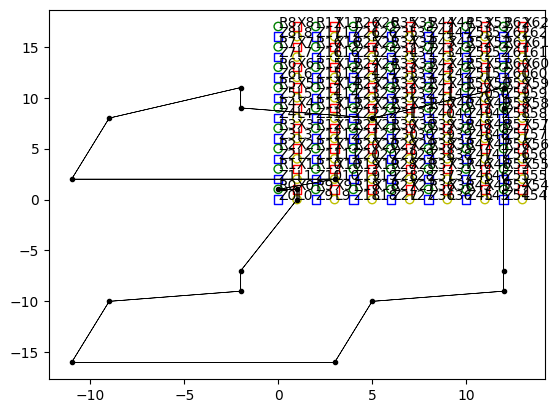

4514.649580019384


In [ ]:
p1 = [(0, 0), (1, 1), (58, 58)]
p2 = [(0, 0), (13, 13), (41, 41)]
l = 7
m = 9
d = 10
code = qLDPC('BB', l, m, p1, p2, d)
dev = Device('BB', 0, 0, 0,0, 5, 0)
solx, solz = tsp_schedule('BB', p1, p2, l, m, dev)
plot_movement_history(l, m, 'BB', solx, dev)
print(move_time(solx, solz))

In [ ]:
tasks = []
p_range = [1e-3, 2e-3, 3e-3, 4e-3, 5e-3]
for p in p_range:
    dev = Device(gate1_err=p, gate2_error=p, readout_err=p, t1=1e6, t2=1e6, spacing=5, multiplier=0.5)
    circ = Circuit(l, m, 'BB', dev, (solx, solz), code)
    circ.generate_circuit(d)
    tasks.append(sinter.Task(circuit=circ.circuit, 
                                 json_metadata={'p': p, 
                                                'Code': f'[{code.n}, {code.k}, {code.d}] Weight {6}'}))

samples = sinter.collect(
    num_workers=10,
    max_shots=1_000_000,
    max_errors=100,
    tasks=tasks,
    decoders=['bposd'],
    custom_decoders={'bposd': BPOSD(max_iter=10_000, bp_method="ms", osd_order=10, osd_method="osd_cs")}
)

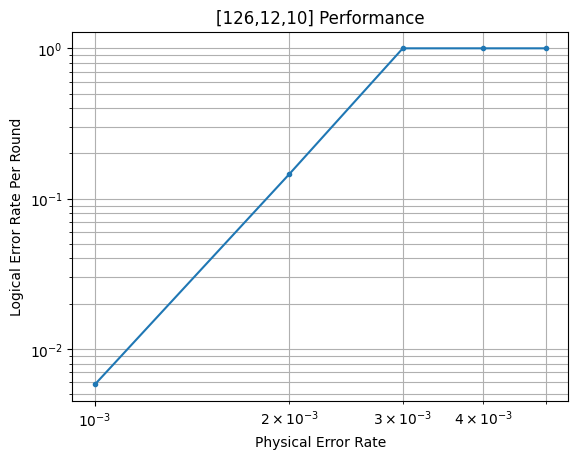

In [ ]:
err_rates = [0 for _ in p_range]
for sample in samples:
    p = sample.json_metadata['p']
    err_rates[p_range.index(p)] = 1 - (1 - (sample.errors / sample.shots))**(1/code.d)
plt.plot(p_range, err_rates, marker='.')
plt.loglog()
plt.grid(which='both')
plt.title('[126,12,10] Performance')
plt.ylabel('Logical Error Rate Per Round')
plt.xlabel('Physical Error Rate')
plt.show()    

## [[42, 6, 7]] CBB

In [ ]:
p1 = [0, 1, 3, 4]
p2 = [0, 1, 6, 10]
l = 3
m = 7
d = 7
code = qLDPC('CBB', l, m, p1, p2, d)
dev = Device('CBB', 0, 0, 0,0, 5)
solx, solz = tsp_schedule('CBB', p1, p2, l, m, dev)
tasks = []
p_range = [1e-3, 2e-3, 3e-3, 4e-3, 5e-3]
for p in p_range:
    dev = Device(gate1_err=p, gate2_error=p, readout_err=p, t1=1e6, t2=1e6, spacing=5)
    circ = Circuit(l, m, 'CBB', dev, (solx, solz), code)
    circ.generate_circuit(d)
    tasks.append(sinter.Task(circuit=circ.circuit, 
                                 json_metadata={'p': p, 
                                                'Code': f'[{code.n}, {code.k}, {code.d}] Weight {6}'}))

samples = sinter.collect(
    num_workers=10,
    max_shots=1_000_000,
    max_errors=100,
    tasks=tasks,
    decoders=['bposd'],
    custom_decoders={'bposd': BPOSD(max_iter=10_000, bp_method="ms", osd_order=10, osd_method="osd_cs")}
)

Problem Name: 3d82582812c24ad49c45e50b25080fb7
Problem Type: TSP
Number of Nodes: 15
Max Norm (CC_MAXNORM)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 640
   0 Steps   Best: 610   0.00 seconds
   7 Total Steps.
Best cycle length: 610
Lin-Kernighan Running Time: 0.00
LK Initial Run: 610.0
LK Run 0: 610.0
LK Run from best tour: 610.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 610 (from tour)
  LP Value  1: 360.000000  (0.00 seconds)
  LP Value  2: 570.000000  (0.00 seconds)
  LP Value  3: 610.000000  (0.00 seconds)
New lower bound: 610.000000
Exact lower bound: 610.000000
DIFF: 0.000000
Established Bound: 610
Optimal tour: 610
Total Time to solve TSP: 0.01
Problem Name: 2827daee0a0c462190b93d7a249a39c3
Problem Type: TSP
Number of Nodes: 15
Max Norm (CC_MAXNORM)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 630
   0 Steps   Best: 610   0.00 seconds
   7 Total Steps.
Best cycl

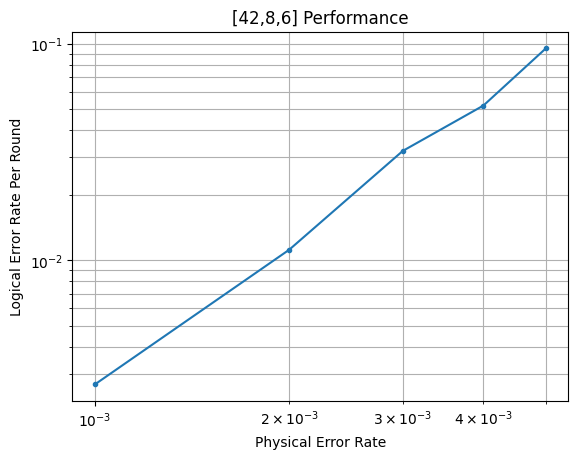

In [ ]:
err_rates = [0 for _ in p_range]
for sample in samples:
    p = sample.json_metadata['p']
    err_rates[p_range.index(p)] = 1 - (1 - (sample.errors / sample.shots))**(1/code.d)
plt.plot(p_range, err_rates, marker='.')
plt.loglog()
plt.grid(which='both')
plt.title('[42,8,6] Performance')
plt.ylabel('Logical Error Rate Per Round')
plt.xlabel('Physical Error Rate')
plt.show()

## [[42, 6, 7]] BB

In [ ]:
p1 = [(0, 0), (1, 1), (3, 4), (4, 4)]
p2 = [(0, 0), (1, 1), (6, 6), (10, 10)]
l = 3
m = 7
d = 7
code = qLDPC('BB', l, m, p1, p2, d)
dev = Device('BB', 0, 0, 0,0, 5)
solx, solz = tsp_schedule('BB', p1, p2, l, m, dev)
tasks = []
p_range = [1e-3, 2e-3, 3e-3, 4e-3, 5e-3]
for p in p_range:
    dev = Device(gate1_err=p, gate2_error=p, readout_err=p, t1=1e6, t2=1e6, spacing=5)
    circ = Circuit(l, m, 'BB', dev, (solx, solz), code)
    circ.generate_circuit(d)
    tasks.append(sinter.Task(circuit=circ.circuit, 
                                 json_metadata={'p': p, 
                                                'Code': f'[{code.n}, {code.k}, {code.d}] Weight {6}'}))

samples = sinter.collect(
    num_workers=10,
    max_shots=1_000_000,
    max_errors=100,
    tasks=tasks,
    decoders=['bposd'],
    custom_decoders={'bposd': BPOSD(max_iter=10_000, bp_method="ms", osd_order=10, osd_method="osd_cs")}
)

Problem Name: caa4c7e6d40a4ad3b1f69b1a15250308
Problem Type: TSP
Number of Nodes: 27
Max Norm (CC_MAXNORM)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 610
   0 Steps   Best: 460   0.00 seconds
   1 Steps   Best: 450   0.00 seconds
  13 Total Steps.
Best cycle length: 450
Lin-Kernighan Running Time: 0.00
LK Initial Run: 450.0
LK Run 0: 450.0
LK Run from best tour: 450.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 450 (from tour)
  LP Value  1: 425.000000  (0.00 seconds)
  LP Value  2: 450.000000  (0.00 seconds)
New lower bound: 450.000000
Exact lower bound: 450.000000
DIFF: 0.000000
Established Bound: 450
Optimal tour: 450
Total Time to solve TSP: 0.00
Problem Name: babe45639c6444a7b15fb9d82fc679bc
Problem Type: TSP
Number of Nodes: 27
Max Norm (CC_MAXNORM)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 540
   0 Steps   Best: 490   0.00 seconds
  13 Total Steps.
Best cycle le

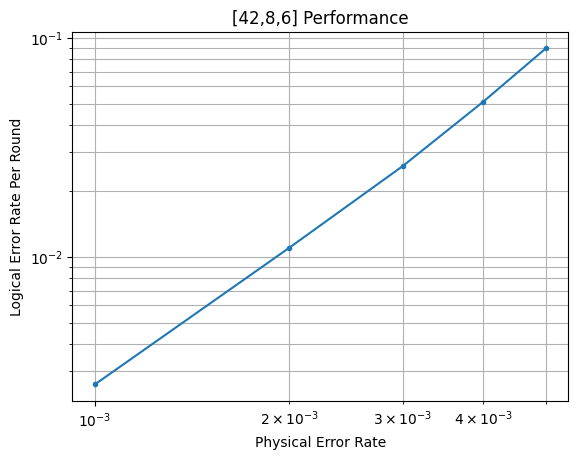

In [ ]:
err_rates = [0 for _ in p_range]
for sample in samples:
    p = sample.json_metadata['p']
    err_rates[p_range.index(p)] = 1 - (1 - (sample.errors / sample.shots))**(1/code.d)
plt.plot(p_range, err_rates, marker='.')
plt.loglog()
plt.grid(which='both')
plt.title('[42,8,6] Performance')
plt.ylabel('Logical Error Rate Per Round')
plt.xlabel('Physical Error Rate')
plt.show()